In [1]:
%load_ext rpy2.ipython

# 3.5 Graphical displays of data and fitted models

## Read the data

Data are in the *child.iq* directory of the ARM_Data download-- you might have
to change the path I use below to reflect the path on your computer.

In [2]:
%%R
# I had to import foreign to get access to read.dta
library("foreign")
kidiq <- read.dta("../../ARM_Data/child.iq/kidiq.dta")

# I won't attach kidiq-- i generally don't attach to avoid confusion(s)
#attach(kidiq)

Load the *arm* library-- see the Chapter 3.1 notebook if you need help.

In [16]:
%%R
library("arm")

## Display a regression line as a function of one input variable, Pg 42

This replicate plot 3.2, Pg 33, as seen in previous notebook.

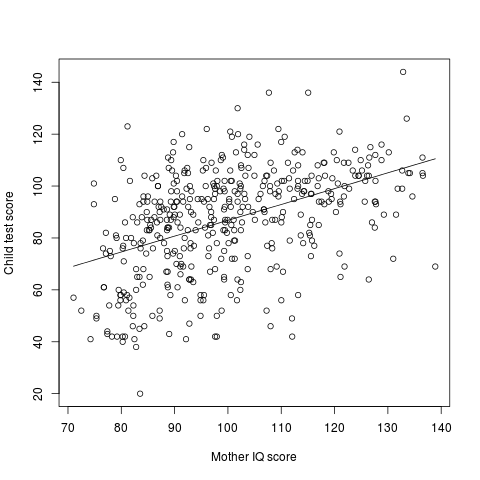

In [4]:
%%R
fit.2 <- lm(kidiq$kid_score ~ kidiq$mom_iq)
plot(kidiq$mom_iq, kidiq$kid_score,
     xlab="Mother IQ score", ylab="Child test score")
curve(coef(fit.2)[1] + coef(fit.2)[2]*x, add=TRUE)

### alternately

Another way of adding the fitted line (using matrix formulation):

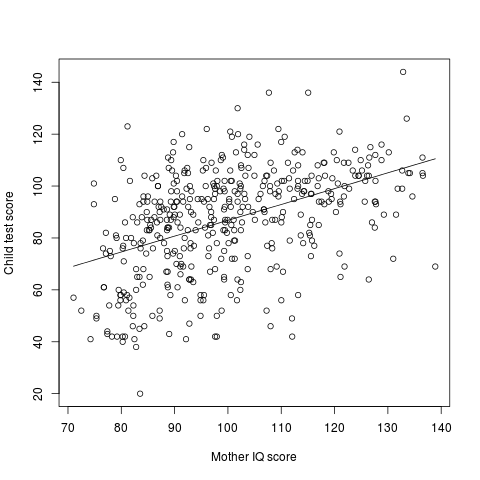

In [5]:
%%R
plot(kidiq$mom_iq, kidiq$kid_score,
     xlab="Mother IQ score", ylab="Child test score")
curve(cbind(1,x) %*% coef(fit.2), add=TRUE)

## Displaying two fitted regression lines, Pg 43

### model with no interaction

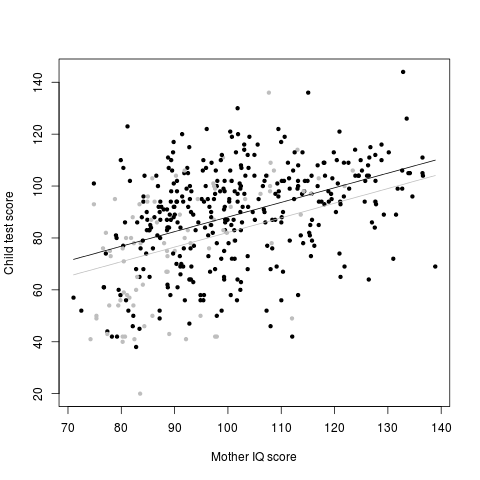

In [6]:
%%R
# fit, no interactions
fit.3 <- lm(kidiq$kid_score ~ kidiq$mom_hs + kidiq$mom_iq)

# define colors
colors <- ifelse(kidiq$mom_hs==1, "black", "gray")

# plot points
plot(kidiq$mom_iq, kidiq$kid_score,
     xlab="Mother IQ score", ylab="Child test score",
     col=colors, pch=20)

# plot fits, using matrix notation
curve(cbind(1, 1, x) %*% coef(fit.3), add=TRUE, col="black")
curve(cbind(1, 0, x) %*% coef(fit.3), add=TRUE, col="gray")

### alternative sequence of commands

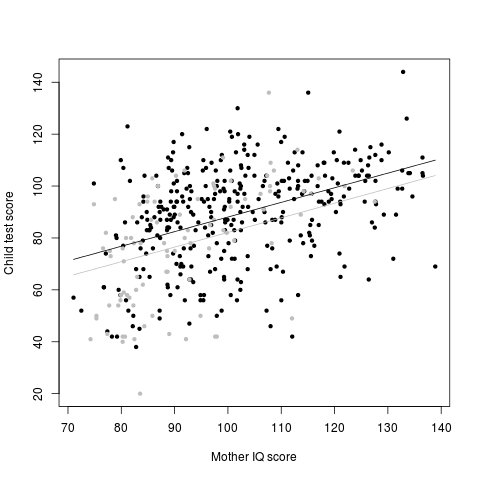

In [7]:
%%R
# set axes, not points
plot(kidiq$mom_iq, kidiq$kid_score,
     xlab="Mother IQ score", ylab="Child test score",
     type="n")

# add points, with appropriate colors
points(kidiq$mom_iq[kidiq$mom_hs==1], kidiq$kid_score[kidiq$mom_hs==1],
       pch=20, col="black")
points(kidiq$mom_iq[kidiq$mom_hs==0], kidiq$kid_score[kidiq$mom_hs==0],
       pch=20, col="gray")

# add fits, using matrix notation
curve(cbind(1, 1, x) %*% coef(fit.3), add=TRUE, col="black")
curve(cbind(1, 0, x) %*% coef(fit.3), add=TRUE, col="gray")

### model with interaction

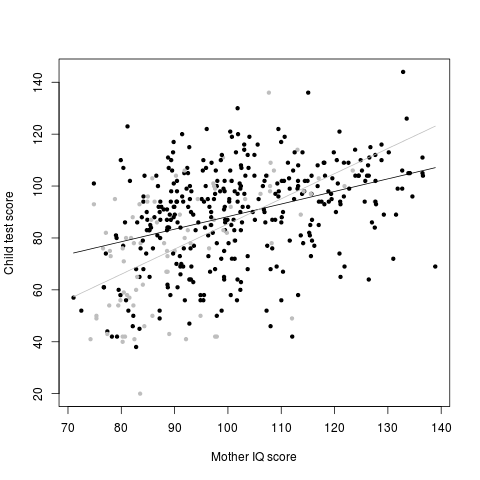

In [8]:
%%R
# fit with interactions
fit.4 <- lm(kidiq$kid_score ~ kidiq$mom_hs + kidiq$mom_iq + kidiq$mom_hs:kidiq$mom_iq)

# setup colors
colors <- ifelse(kidiq$mom_hs==1, "black", "gray")

# plot points using colors
plot(kidiq$mom_iq, kidiq$kid_score,
     xlab="Mother IQ score", ylab="Child test score",
     col=colors, pch=20)

# add fits using matrix notation
curve(cbind(1, 1, x, 1*x) %*% coef(fit.4), add=TRUE, col="black")
curve(cbind(1, 0, x, 0*x) %*% coef(fit.4), add=TRUE, col="gray")

## Displaying uncertainty in the fitted regression, Pg 43

In [9]:
%%R
fit.2 <- lm(kidiq$kid_score ~ kidiq$mom_iq)
display(fit.2)

lm(formula = kidiq$kid_score ~ kidiq$mom_iq)
             coef.est coef.se
(Intercept)  25.80     5.92  
kidiq$mom_iq  0.61     0.06  
---
n = 434, k = 2
residual sd = 18.27, R-Squared = 0.20


### Replicating Figure 3.10, Pg 44

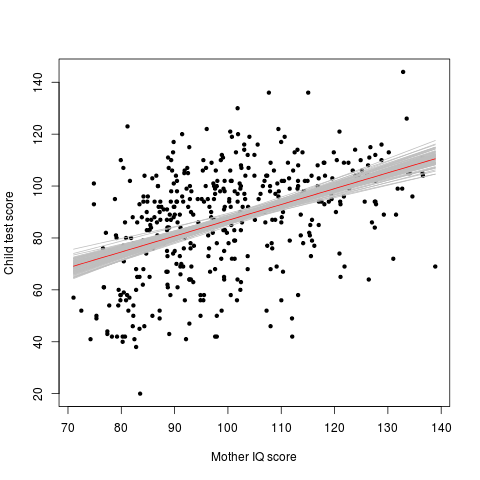

In [10]:
%%R
# generate samples of fit parameters, reflecting uncertainty
# 100 sets of parameters generated
fit.2.sim <- sim(fit.2)

# plot points
plot(kidiq$mom_iq, kidiq$kid_score,
     xlab="Mother IQ score", ylab="Child test score",
     pch=20)

# plot lines with sampled parameters, use all 100
for (i in 1:100) {
    # $ access gave errors, use coef()
    curve(coef(fit.2.sim)[i,1] + coef(fit.2.sim)[i,2]*x, add=TRUE,col="gray")
}

# add best fit in red
curve(coef(fit.2)[1] + coef(fit.2)[2]*x, add=TRUE, col="red")

### alternatively

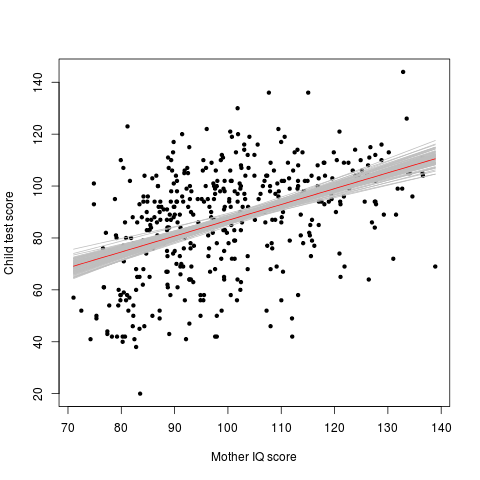

In [11]:
%%R
# plot points
plot(kidiq$mom_iq, kidiq$kid_score,
     xlab="Mother IQ score", ylab="Child test score",
     pch=20)

# define function to plot lines from samples of parameters, reflecting
# uncertainty
Oneline <- function(beta) {
    curve(beta[1]+beta[2]*x, add=TRUE, col="gray")
}
# apply the function
# again, change $ access to coef()
apply(coef(fit.2.sim), 1, Oneline)

curve(coef(fit.2)[1] + coef(fit.2)[2]*x, add=TRUE, col="red")

## Displaying using one plot for each input variable, Pg 44

In [12]:
%%R
# fit, no interactions
fit.3 <- lm(kidiq$kid_score ~ kidiq$mom_hs + kidiq$mom_iq)

# get estimate coefficients
beta.hat <- coef(fit.3)

# sample coefficients to reflect uncertainty
beta.sim <- coef(sim(fit.3))

In [13]:
%%R
kidscore.jitter <- jitter(kidiq$kid_score)

In [14]:
%%R
jitter.binary <- function(a, jitt=.05){
   ifelse (a==0, runif (length(a), 0, jitt), runif (length(a), 1-jitt, 1))
}

jitter.mom_hs <- jitter.binary(kidiq$mom_hs)

### Replicating Figure 3.11, Pg 45

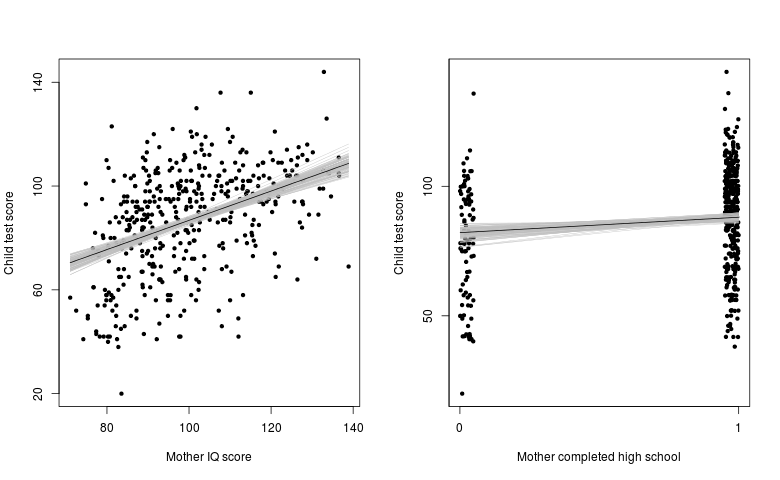

In [15]:
%%R -w 780 -h 480 -u px
par(mfrow=c(1,2))

# PLOT 1
plot(kidiq$mom_iq, kidiq$kid_score,
     xlab="Mother IQ score", ylab="Child test score", 
     pch=20, xaxt="n", yaxt="n")
axis(1, c(80,100,120,140))
axis(2, c(20,60,100,140))

# plot samples to reflect uncertainty-- use all 100
for (i in 1:100) {
  curve(cbind (1, mean(kidiq$mom_hs), x) %*% beta.sim[i,], lwd=.5, col="gray",
        add=TRUE)
}
# add best fit line
curve(cbind (1, mean(kidiq$mom_hs), x) %*% beta.hat, col="black", add=TRUE)

# PLOT 2
plot(jitter.mom_hs, kidscore.jitter,
     xlab="Mother completed high school", ylab="Child test score",
     pch=20, xaxt="n", yaxt="n")
axis(1, seq(0,1))
axis(2, c(0,50,100,150))

# plot samples to reflect uncertainty-- use all 100
for (i in 1:100) {
  curve(cbind (1, x, mean(kidiq$mom_iq)) %*% beta.sim[i,], lwd=.5, col="gray",
        add=TRUE)
}
# add best fit line
curve(cbind (1, x, mean(kidiq$mom_iq)) %*% beta.hat, col="black", add=TRUE)